<a href="https://colab.research.google.com/github/TARUN2K3/DATA-_SCIENCE_PROJECT_1/blob/main/detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [ ]:
data_set=pd.read_csv("/content/creditcard.csv")

In [ ]:
data_set

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17913,29027,-0.422159,0.231118,1.666711,0.451976,-0.203598,0.097244,-0.039666,0.354218,0.062463,...,0.110909,0.435121,-0.056658,0.265867,-0.548204,0.734013,0.117023,0.130972,9.00,0.0
17914,29030,1.177387,-0.215585,0.202972,0.215323,-0.029312,0.601788,-0.297021,0.188082,0.436370,...,-0.055842,0.075903,-0.187120,-0.717798,0.555294,0.731531,-0.022112,-0.010929,25.00,0.0
17915,29030,-0.553746,0.880858,1.644821,-0.132657,0.120940,-0.267411,0.466892,0.222443,-0.639624,...,-0.133339,-0.348662,0.029947,0.199962,-0.328384,0.071511,0.275487,0.110195,0.89,0.0
17916,29030,-2.844632,3.717960,-7.165428,4.120419,-2.991039,-2.942326,-4.925187,2.204337,-2.663613,...,0.894495,-0.340246,0.012222,-0.059679,-0.104338,-0.295884,1.326228,0.322688,89.99,0.0


In [ ]:
pd.DataFrame(data_set,columns=['Class'])

,Class
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
17913,0.0
17914,0.0
17915,0.0
17916,0.0


In [ ]:
data_set['Class'].value_counts()

0.0    17836
1.0       81
Name: Class, dtype: int64

In [ ]:
x=data_set['Class'].value_counts().sum()

In [ ]:
x

17917

In [ ]:
percentage = ( data_set['Class'].value_counts()/ x) * 100

In [ ]:
percentage

0.0    99.547915
1.0     0.452085
Name: Class, dtype: float64

In [ ]:
labels=[0,1]

Text(0.5, 1.0, 'credit card fraud detection')

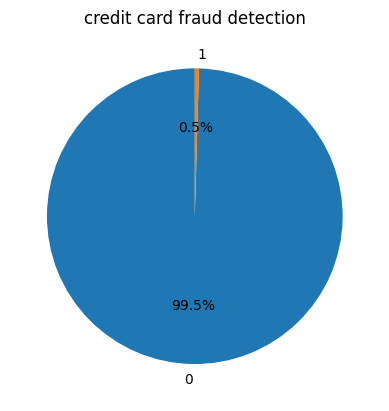

In [ ]:
plt.pie(percentage, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('credit card fraud detection')

In [ ]:
data_set.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        1
V6        1
V7        1
V8        1
V9        1
V10       1
V11       1
V12       1
V13       1
V14       1
V15       1
V16       1
V17       1
V18       1
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

In [ ]:
data_set=data_set.fillna(value=0)

In [ ]:
data_set.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [ ]:
legit=data_set[data_set.Class == 0]
fraud=data_set[data_set.Class == 1]

In [ ]:
fraud

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1.0
623,472,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1.0
4920,4462,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1.0
6108,6986,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1.0
6329,7519,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17317,28625,-27.848181,15.598193,-28.923756,6.418442,-20.346228,-4.828202,-19.210896,18.329406,-3.668735,...,1.802149,-2.062934,-1.269843,0.165409,1.999499,-0.211059,1.324809,0.388090,99.99,1.0
17366,28658,-28.524268,15.876923,-29.468732,6.447591,-20.786000,-4.865613,-19.501084,18.748872,-3.642990,...,1.805770,-2.119376,-1.317450,0.169846,2.051687,-0.210502,1.301734,0.380246,99.99,1.0
17407,28692,-29.200329,16.155701,-30.013712,6.476731,-21.225810,-4.902997,-19.791248,19.168327,-3.617242,...,1.809371,-2.175815,-1.365104,0.174286,2.103868,-0.209944,1.278681,0.372393,99.99,1.0
17453,28726,-29.876366,16.434525,-30.558697,6.505862,-21.665654,-4.940356,-20.081391,19.587773,-3.591491,...,1.812954,-2.232252,-1.412803,0.178731,2.156042,-0.209385,1.255649,0.364530,99.99,1.0


In [ ]:
legit

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17913,29027,-0.422159,0.231118,1.666711,0.451976,-0.203598,0.097244,-0.039666,0.354218,0.062463,...,0.110909,0.435121,-0.056658,0.265867,-0.548204,0.734013,0.117023,0.130972,9.00,0.0
17914,29030,1.177387,-0.215585,0.202972,0.215323,-0.029312,0.601788,-0.297021,0.188082,0.436370,...,-0.055842,0.075903,-0.187120,-0.717798,0.555294,0.731531,-0.022112,-0.010929,25.00,0.0
17915,29030,-0.553746,0.880858,1.644821,-0.132657,0.120940,-0.267411,0.466892,0.222443,-0.639624,...,-0.133339,-0.348662,0.029947,0.199962,-0.328384,0.071511,0.275487,0.110195,0.89,0.0
17916,29030,-2.844632,3.717960,-7.165428,4.120419,-2.991039,-2.942326,-4.925187,2.204337,-2.663613,...,0.894495,-0.340246,0.012222,-0.059679,-0.104338,-0.295884,1.326228,0.322688,89.99,0.0


In [ ]:
legit

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17913,29027,-0.422159,0.231118,1.666711,0.451976,-0.203598,0.097244,-0.039666,0.354218,0.062463,...,0.110909,0.435121,-0.056658,0.265867,-0.548204,0.734013,0.117023,0.130972,9.00,0.0
17914,29030,1.177387,-0.215585,0.202972,0.215323,-0.029312,0.601788,-0.297021,0.188082,0.436370,...,-0.055842,0.075903,-0.187120,-0.717798,0.555294,0.731531,-0.022112,-0.010929,25.00,0.0
17915,29030,-0.553746,0.880858,1.644821,-0.132657,0.120940,-0.267411,0.466892,0.222443,-0.639624,...,-0.133339,-0.348662,0.029947,0.199962,-0.328384,0.071511,0.275487,0.110195,0.89,0.0
17916,29030,-2.844632,3.717960,-7.165428,4.120419,-2.991039,-2.942326,-4.925187,2.204337,-2.663613,...,0.894495,-0.340246,0.012222,-0.059679,-0.104338,-0.295884,1.326228,0.322688,89.99,0.0


In [ ]:
fraud

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1.0
623,472,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1.0
4920,4462,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1.0
6108,6986,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1.0
6329,7519,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17317,28625,-27.848181,15.598193,-28.923756,6.418442,-20.346228,-4.828202,-19.210896,18.329406,-3.668735,...,1.802149,-2.062934,-1.269843,0.165409,1.999499,-0.211059,1.324809,0.388090,99.99,1.0
17366,28658,-28.524268,15.876923,-29.468732,6.447591,-20.786000,-4.865613,-19.501084,18.748872,-3.642990,...,1.805770,-2.119376,-1.317450,0.169846,2.051687,-0.210502,1.301734,0.380246,99.99,1.0
17407,28692,-29.200329,16.155701,-30.013712,6.476731,-21.225810,-4.902997,-19.791248,19.168327,-3.617242,...,1.809371,-2.175815,-1.365104,0.174286,2.103868,-0.209944,1.278681,0.372393,99.99,1.0
17453,28726,-29.876366,16.434525,-30.558697,6.505862,-21.665654,-4.940356,-20.081391,19.587773,-3.591491,...,1.812954,-2.232252,-1.412803,0.178731,2.156042,-0.209385,1.255649,0.364530,99.99,1.0


In [ ]:
df=legit.Amount.describe()
df=pd.DataFrame(df)

In [ ]:
df1=fraud.Amount.describe()
df1=pd.DataFrame(df1)

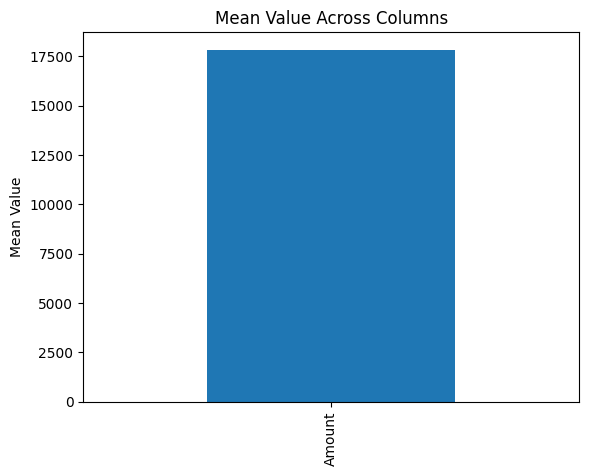

In [ ]:
import matplotlib.pyplot as plt
df.loc['count'].plot(kind='bar')
plt.ylabel('Mean Value')
plt.title('Mean Value Across Columns')
plt.show()


In [ ]:
mean_values = df.loc['mean']
count_values = df.loc['count']

In [ ]:
summary_df = pd.DataFrame({'Mean': mean_values, 'Count': count_values})

<BarContainer object of 1 artists>

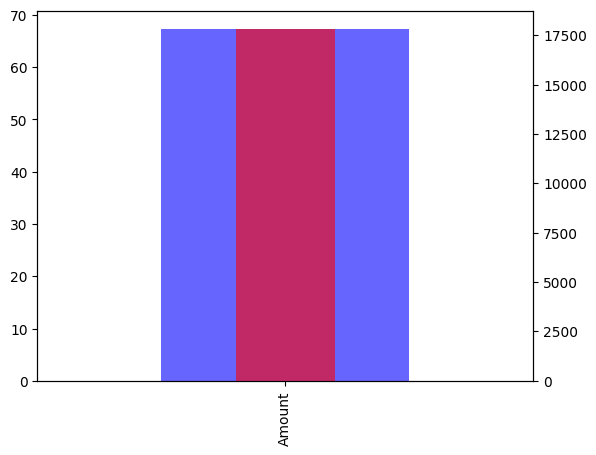

In [ ]:
ax = summary_df['Mean'].plot(kind='bar', color='blue', alpha=0.6, label='Mean')
ax2 = ax.twinx()
ax2.bar(ax.get_xticks(), summary_df['Count'], color='red', alpha=0.6, width=0.2, label='Count')

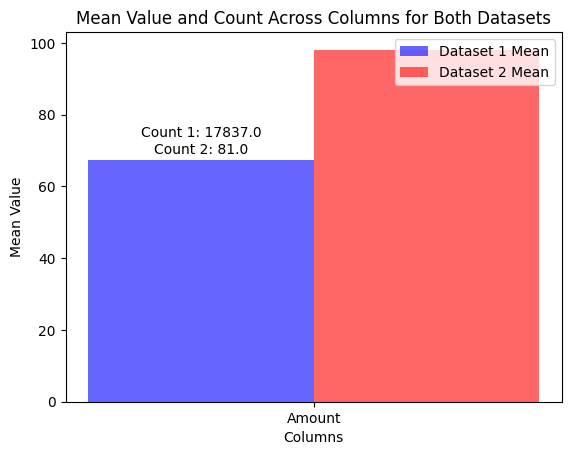

In [ ]:
mean_values1 = df.loc['mean']
count_values1 = df.loc['count']

mean_values2 = df1.loc['mean']
count_values2 = df1.loc['count']

# Combine the mean and count values into separate DataFrames
summary_df1 = pd.DataFrame({'Mean': mean_values1, 'Count': count_values1})
summary_df2 = pd.DataFrame({'Mean': mean_values2, 'Count': count_values2})

# Create a bar chart with mean and count values for both datasets
width = 0.35  # Width of each bar

fig, ax = plt.subplots()

x = np.arange(len(mean_values1.index))  # x-axis values

bar1 = ax.bar(x - width/2, summary_df1['Mean'], width, label='Dataset 1 Mean', color='blue', alpha=0.6)
bar2 = ax.bar(x + width/2, summary_df2['Mean'], width, label='Dataset 2 Mean', color='red', alpha=0.6)

# Set labels and legends
ax.set_ylabel('Mean Value')
ax.set_xlabel('Columns')
ax.set_xticks(x)
ax.set_xticklabels(mean_values1.index, rotation=0)
ax.legend(loc='upper right')

for bar, count1, count2 in zip(bar1, count_values1, count_values2):
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1, f'Count 1: {count1}\nCount 2: {count2}',
            ha='center', va='bottom')

plt.title('Mean Value and Count Across Columns for Both Datasets')
plt.show()

In [ ]:
n_rows_to_sample = fraud.shape[0]

In [ ]:
legit = legit.sample(n=n_rows_to_sample ,replace=True)

In [ ]:
legit

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
1170,912,1.083003,0.201589,1.497664,2.661922,-0.621256,0.618554,-0.644140,0.310919,0.125964,...,-0.060433,0.009647,0.077072,0.072141,0.220747,-0.013483,0.058596,0.032054,0.00,0.0
4319,3760,1.328743,-0.401026,0.811332,-0.520044,-1.100566,-0.793226,-0.720171,-0.146853,0.232645,...,-0.173160,-0.437594,0.148658,0.448863,0.145030,-0.551061,-0.022306,0.010256,21.05,0.0
3123,2699,-2.270916,-0.742975,0.514417,2.114061,2.075482,-0.082182,-1.006941,0.987098,-0.981180,...,0.417697,0.572805,-0.083940,-0.713154,-0.359861,-0.022753,0.154393,-0.247212,1.00,0.0
11536,19905,1.335716,-0.698605,0.456234,-0.472094,-0.821183,0.158951,-0.984187,0.183978,0.935297,...,-0.140754,-0.168524,-0.016203,-0.390167,0.401391,-0.243096,-0.014728,-0.015073,8.00,0.0
17230,28547,1.246483,1.334217,-1.576549,1.643697,0.878091,-1.820519,0.810340,-0.414580,-0.520212,...,-0.204335,-0.465848,-0.214804,0.073891,0.873506,-0.295977,0.042978,0.098151,1.79,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4004,3644,1.194600,0.464846,0.567368,0.918423,-0.224340,-0.730690,-0.043855,-0.194668,1.216385,...,-0.383679,-0.800939,0.205362,0.312575,0.093671,0.063719,-0.029560,0.025278,1.29,0.0
15289,26660,-0.990726,0.164861,1.444505,-3.759372,-0.136833,-0.912676,0.670079,0.057644,1.743911,...,0.038241,0.207098,-0.561191,0.014123,1.011695,-0.917925,-0.089033,0.038042,9.95,0.0
8577,11563,-1.292523,1.987787,1.665962,2.743563,-0.101817,0.472415,0.039911,0.474843,0.157256,...,-0.321322,-0.520931,0.118533,0.093261,-0.510925,-0.105309,0.145069,0.024361,3.88,0.0
2799,2357,1.273223,0.112394,0.168771,0.319982,-0.097302,-0.215178,-0.115811,0.043042,-0.027936,...,-0.269431,-0.855057,0.031375,-0.525718,0.268250,0.131185,-0.039748,-0.001232,2.69,0.0


In [ ]:
fraud

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1.0
623,472,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1.0
4920,4462,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1.0
6108,6986,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1.0
6329,7519,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17317,28625,-27.848181,15.598193,-28.923756,6.418442,-20.346228,-4.828202,-19.210896,18.329406,-3.668735,...,1.802149,-2.062934,-1.269843,0.165409,1.999499,-0.211059,1.324809,0.388090,99.99,1.0
17366,28658,-28.524268,15.876923,-29.468732,6.447591,-20.786000,-4.865613,-19.501084,18.748872,-3.642990,...,1.805770,-2.119376,-1.317450,0.169846,2.051687,-0.210502,1.301734,0.380246,99.99,1.0
17407,28692,-29.200329,16.155701,-30.013712,6.476731,-21.225810,-4.902997,-19.791248,19.168327,-3.617242,...,1.809371,-2.175815,-1.365104,0.174286,2.103868,-0.209944,1.278681,0.372393,99.99,1.0
17453,28726,-29.876366,16.434525,-30.558697,6.505862,-21.665654,-4.940356,-20.081391,19.587773,-3.591491,...,1.812954,-2.232252,-1.412803,0.178731,2.156042,-0.209385,1.255649,0.364530,99.99,1.0


In [ ]:
new_data_set=pd.concat([legit,fraud])

In [ ]:
new_data_set

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
1170,912,1.083003,0.201589,1.497664,2.661922,-0.621256,0.618554,-0.644140,0.310919,0.125964,...,-0.060433,0.009647,0.077072,0.072141,0.220747,-0.013483,0.058596,0.032054,0.00,0.0
4319,3760,1.328743,-0.401026,0.811332,-0.520044,-1.100566,-0.793226,-0.720171,-0.146853,0.232645,...,-0.173160,-0.437594,0.148658,0.448863,0.145030,-0.551061,-0.022306,0.010256,21.05,0.0
3123,2699,-2.270916,-0.742975,0.514417,2.114061,2.075482,-0.082182,-1.006941,0.987098,-0.981180,...,0.417697,0.572805,-0.083940,-0.713154,-0.359861,-0.022753,0.154393,-0.247212,1.00,0.0
11536,19905,1.335716,-0.698605,0.456234,-0.472094,-0.821183,0.158951,-0.984187,0.183978,0.935297,...,-0.140754,-0.168524,-0.016203,-0.390167,0.401391,-0.243096,-0.014728,-0.015073,8.00,0.0
17230,28547,1.246483,1.334217,-1.576549,1.643697,0.878091,-1.820519,0.810340,-0.414580,-0.520212,...,-0.204335,-0.465848,-0.214804,0.073891,0.873506,-0.295977,0.042978,0.098151,1.79,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17317,28625,-27.848181,15.598193,-28.923756,6.418442,-20.346228,-4.828202,-19.210896,18.329406,-3.668735,...,1.802149,-2.062934,-1.269843,0.165409,1.999499,-0.211059,1.324809,0.388090,99.99,1.0
17366,28658,-28.524268,15.876923,-29.468732,6.447591,-20.786000,-4.865613,-19.501084,18.748872,-3.642990,...,1.805770,-2.119376,-1.317450,0.169846,2.051687,-0.210502,1.301734,0.380246,99.99,1.0
17407,28692,-29.200329,16.155701,-30.013712,6.476731,-21.225810,-4.902997,-19.791248,19.168327,-3.617242,...,1.809371,-2.175815,-1.365104,0.174286,2.103868,-0.209944,1.278681,0.372393,99.99,1.0
17453,28726,-29.876366,16.434525,-30.558697,6.505862,-21.665654,-4.940356,-20.081391,19.587773,-3.591491,...,1.812954,-2.232252,-1.412803,0.178731,2.156042,-0.209385,1.255649,0.364530,99.99,1.0


In [ ]:
new_data_set["Class"].value_counts()

0.0    81
1.0    81
Name: Class, dtype: int64

In [ ]:
x=new_data_set.drop(["Class"],axis=1)
y=new_data_set['Class']

In [ ]:
x

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
1170,912,1.083003,0.201589,1.497664,2.661922,-0.621256,0.618554,-0.644140,0.310919,0.125964,...,-0.203726,-0.060433,0.009647,0.077072,0.072141,0.220747,-0.013483,0.058596,0.032054,0.00
4319,3760,1.328743,-0.401026,0.811332,-0.520044,-1.100566,-0.793226,-0.720171,-0.146853,0.232645,...,0.054615,-0.173160,-0.437594,0.148658,0.448863,0.145030,-0.551061,-0.022306,0.010256,21.05
3123,2699,-2.270916,-0.742975,0.514417,2.114061,2.075482,-0.082182,-1.006941,0.987098,-0.981180,...,0.526046,0.417697,0.572805,-0.083940,-0.713154,-0.359861,-0.022753,0.154393,-0.247212,1.00
11536,19905,1.335716,-0.698605,0.456234,-0.472094,-0.821183,0.158951,-0.984187,0.183978,0.935297,...,-0.152785,-0.140754,-0.168524,-0.016203,-0.390167,0.401391,-0.243096,-0.014728,-0.015073,8.00
17230,28547,1.246483,1.334217,-1.576549,1.643697,0.878091,-1.820519,0.810340,-0.414580,-0.520212,...,-0.004013,-0.204335,-0.465848,-0.214804,0.073891,0.873506,-0.295977,0.042978,0.098151,1.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17317,28625,-27.848181,15.598193,-28.923756,6.418442,-20.346228,-4.828202,-19.210896,18.329406,-3.668735,...,1.697856,1.802149,-2.062934,-1.269843,0.165409,1.999499,-0.211059,1.324809,0.388090,99.99
17366,28658,-28.524268,15.876923,-29.468732,6.447591,-20.786000,-4.865613,-19.501084,18.748872,-3.642990,...,1.706889,1.805770,-2.119376,-1.317450,0.169846,2.051687,-0.210502,1.301734,0.380246,99.99
17407,28692,-29.200329,16.155701,-30.013712,6.476731,-21.225810,-4.902997,-19.791248,19.168327,-3.617242,...,1.715862,1.809371,-2.175815,-1.365104,0.174286,2.103868,-0.209944,1.278681,0.372393,99.99
17453,28726,-29.876366,16.434525,-30.558697,6.505862,-21.665654,-4.940356,-20.081391,19.587773,-3.591491,...,1.724779,1.812954,-2.232252,-1.412803,0.178731,2.156042,-0.209385,1.255649,0.364530,99.99


In [ ]:
y

1170     0.0
4319     0.0
3123     0.0
11536    0.0
17230    0.0
        ... 
17317    1.0
17366    1.0
17407    1.0
17453    1.0
17480    1.0
Name: Class, Length: 162, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [ ]:
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression()

In [ ]:
clf.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_Pred=clf.predict(x_train)

In [ ]:
from sklearn.metrics import accuracy_score
y_accuracy=accuracy_score(y_Pred,y_train)

In [ ]:
y_accuracy

0.9922480620155039

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_Pred,y_train)

array([[63,  0],
       [ 1, 65]])